<a href="https://colab.research.google.com/github/gabrielfraga17/IA-Generativa/blob/main/akcit_genai_m11_colab_unidade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

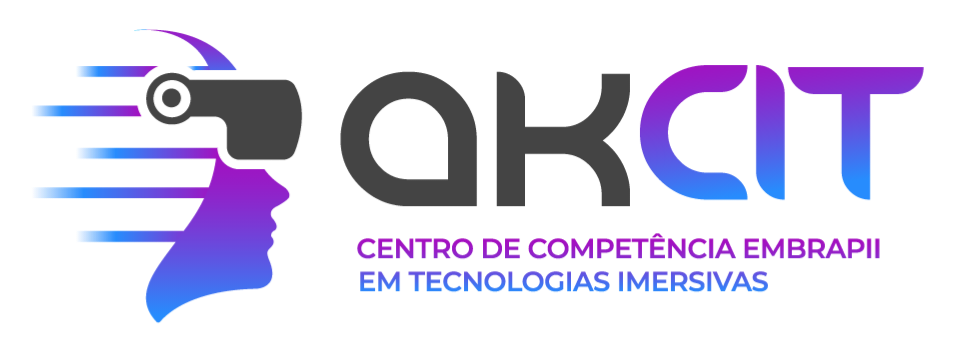


# Identificação

**Microcurso:** Arquiteturas Neurais Avançadas para IA Generativa para Áudio e Voz


**Docente:** Prof. Dr. Frederico Santos de Oliveira

# Check-list para escrita do Notebook Colab

[ ] Objetivos (definir os objetivos de aprendizagem, destacando o que os estudantes devem aprender ou realizar ao final).

[ ] Estruturação (organizar o Colab de forma lógica e sequencial, seguindo a estrutura dos tópicos da ementa do Microcurso).

[ ] Introdução (fornecer uma introdução detalhada ao tópico, explicando sua importância e relevância para a análise de dados).

[ ] Explicação teórica (incluir explicações teóricas sobre os conceitos abordados, utilizando linguagem acessível aos estudantes).

[ ] Exemplos práticos (apresentar exemplos práticos de implementação dos conceitos discutidos, utilizando código-fonte e visualizações sempre que possível).

[ ] Exercícios e desafios (inserir exercícios e desafios ao longo do Colab para que os estudantes possam aplicar e reforçar o que aprenderam).

[ ] Recursos visuais (incluir imagens, gráficos e outros recursos visuais para ilustrar conceitos complexos e facilitar a compreensão dos estudantes).

[ ] Referências bibliográficas (citar referências bibliográficas importantes para que os estudantes possam aprofundar o seu conhecimento sobre o tópico).

# Objetivos de Aprendizagem

*  Definir claramente os objetivos, destacando o que os estudantes vão aprender ou realizar ao final.



# Tutorial Prático: Da Teoria à Implementação com Librosa


Bem-vindo(a) a este tutorial prático! Conforme vimos na Unidade I, para que os modelos de deep learning possam processar e gerar áudio, primeiro precisamos transformar o som em uma representação digital e, em seguida, extrair características informativas.


Neste guia, vamos solidificar os conceitos teóricos, mostrando passo a passo como carregar um arquivo de áudio e visualizá-lo em suas representações mais fundamentais: a Forma de Onda, o Espectrograma e o Espectrograma Mel. Utilizaremos a biblioteca librosa, uma ferramenta poderosa em Python para análise de áudio, e a matplotlib para visualização.

## Passo 1: Configuração do Ambiente

Antes de começarmos, precisamos garantir que as bibliotecas necessárias estejam instaladas. Se você estiver usando o Google Colab, pode executar o seguinte comando em uma célula de código para instalar o librosa. A matplotlib geralmente já vem instalada.


In [ ]:
# Instala a biblioteca librosa para análise de áudio
!pip install librosa

## Passo 2: Carregando um Arquivo de Áudio
O primeiro passo em qualquer tarefa de processamento de áudio é carregar o sinal digital. Utilizaremos uma função do librosa que carrega um arquivo de áudio e o decodifica em uma série temporal.


Conceito-chave: A série temporal retornada é uma sequência de números que representa a amplitude da onda sonora em instantes específicos. O processo de medir essa amplitude em intervalos regulares é a amostragem.





In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Carrega um arquivo de áudio de exemplo fornecido pelo librosa
# y: a série temporal do áudio (forma de onda)
# sr: a taxa de amostragem (sample rate) do áudio
y, sr = librosa.load(librosa.ex('trumpet'))

print(f"Áudio carregado com sucesso!")
print(f"Taxa de amostragem (sr): {sr} Hz")
print(f"Número de amostras: {len(y)}")

Áudio carregado com sucesso!
Taxa de amostragem (sr): 22050 Hz
Número de amostras: 117601


Observação: Por padrão, o librosa converte a taxa de amostragem de todos os áudios para 22.050 Hz. Essa taxa, embora menor que a de um CD (44.100 Hz), é suficiente para capturar todas as frequências relevantes para a maioria das tarefas de análise de música e voz, respeitando o Teorema de Nyquist-Shannon.

## Passo 3: Visualizando a Forma de Onda (Waveform)
A forma de onda é a representação mais fundamental de um sinal de áudio, mostrando como sua amplitude varia ao longo do tempo. A amplitude está relacionada à nossa percepção de volume (loudness), e a rapidez das oscilações (frequência) está relacionada à altura do som (pitch).


Vamos visualizar a forma de onda do áudio que carregamos.

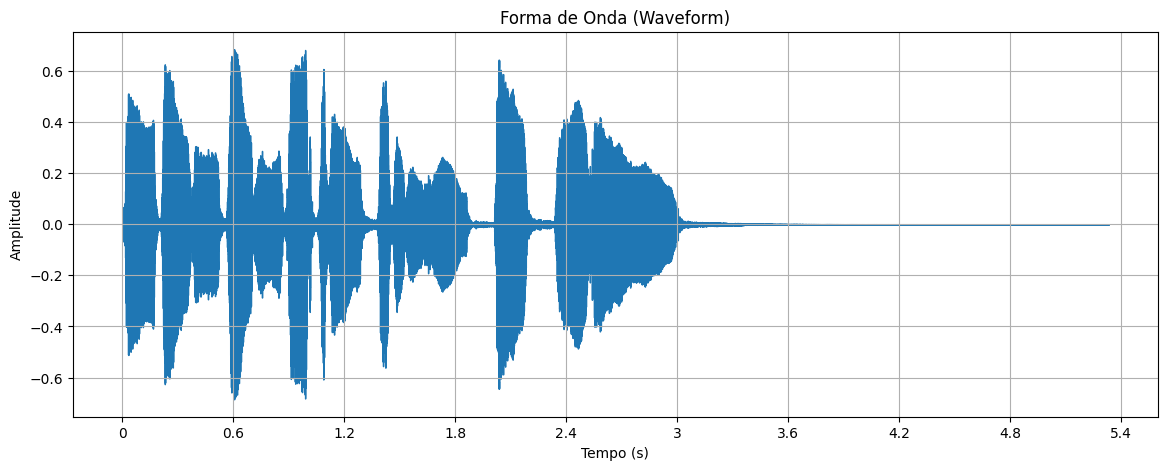

In [ ]:
# Configura o tamanho da figura para a visualização
plt.figure(figsize=(14, 5))

# Plota a forma de onda
librosa.display.waveshow(y, sr=sr)
plt.title('Forma de Onda (Waveform)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

No gráfico acima, você pode ver claramente as flutuações de pressão do som ao longo do tempo. As partes com maior amplitude correspondem aos momentos em que o trompete soa mais forte.

## Passo 4: Gerando o Espectrograma

Embora a forma de onda seja útil, ela não revela o conteúdo de frequência do áudio. Para isso, usamos o espectrograma, uma poderosa representação visual que mostra a intensidade das diferentes frequências ao longo do tempo.


Conceito-chave: O espectrograma é gerado aplicando a Transformada de Fourier de Curta Duração (STFT), que divide o sinal em pequenas janelas e calcula o espectro de frequência para cada uma delas.



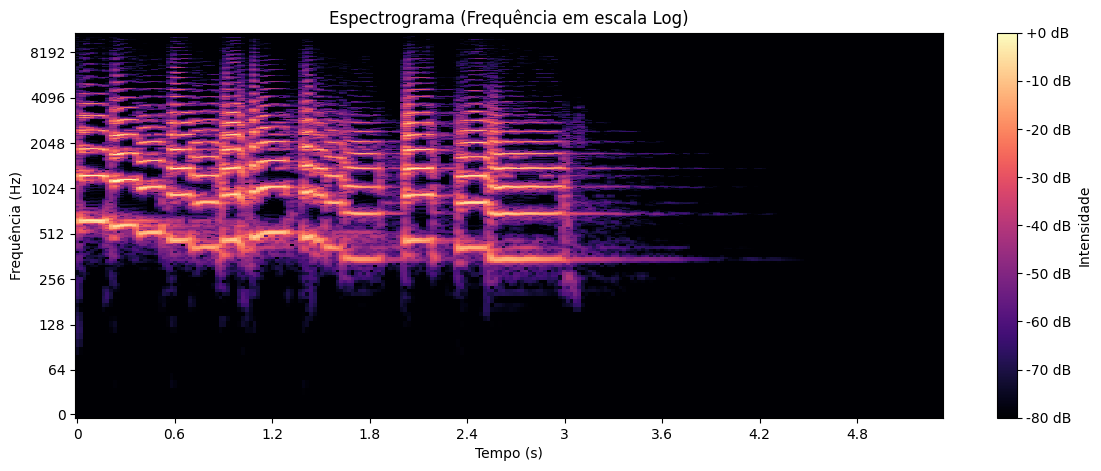

In [ ]:
# Calcula a STFT do sinal
D = librosa.stft(y)

# Converte a amplitude do espectro para a escala de decibéis (dB)
# A escala em dB é logarítmica e se aproxima mais da nossa percepção de volume
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plota o espectrograma
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB', label='Intensidade')
plt.title('Espectrograma (Frequência em escala Log)')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.show()

Neste gráfico, o eixo X representa o tempo, o eixo Y representa a frequência e as cores mais claras (amarelo) indicam as frequências que têm maior energia (são mais "altas") em cada instante de tempo.

## Passo 5: Gerando o Espectrograma Mel
Para tarefas que dependem da percepção humana, como reconhecimento de fala, o Espectrograma Mel é frequentemente preferido.


Conceito-chave: Ele utiliza a escala Mel, uma escala de frequência não-linear que imita a forma como o ouvido humano percebe as frequências, dando mais importância aos tons mais graves.

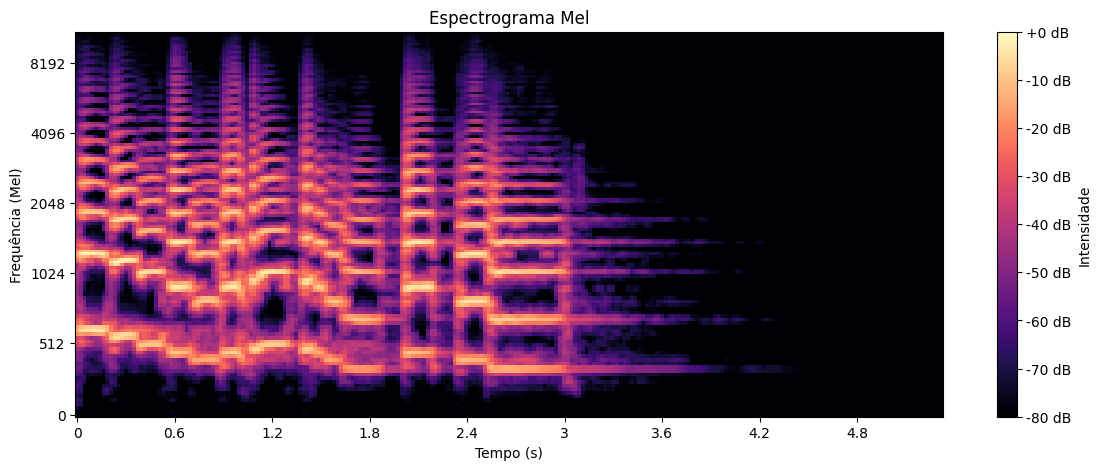

In [ ]:
# Calcula o espectrograma Mel
S_mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Converte para a escala de decibéis (dB)
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plota o espectrograma Mel
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB', label='Intensidade')
plt.title('Espectrograma Mel')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Mel)')
plt.show()

Observe como o eixo Y agora está na escala Mel. Visualmente, a representação dá mais espaço e detalhe para as frequências mais baixas, que são cruciais para a percepção da fala e da música. É por isso que esta é a representação mais comum em modelos de TTS modernos.



## Passo 6: Extraindo Coeficientes Cepstrais de Frequência Mel (MFCCs)
Os MFCCs são uma das representações mais importantes e amplamente utilizadas no processamento de áudio, especialmente em reconhecimento de fala.


Conceito-chave: Conforme visto na Unidade I, os MFCCs são um conjunto de coeficientes que representam de forma compacta o envelope espectral de um som, utilizando a escala Mel para enfatizar as frequências que são mais importantes para a audição humana.

Vamos calcular e visualizar os MFCCs do nosso áudio.

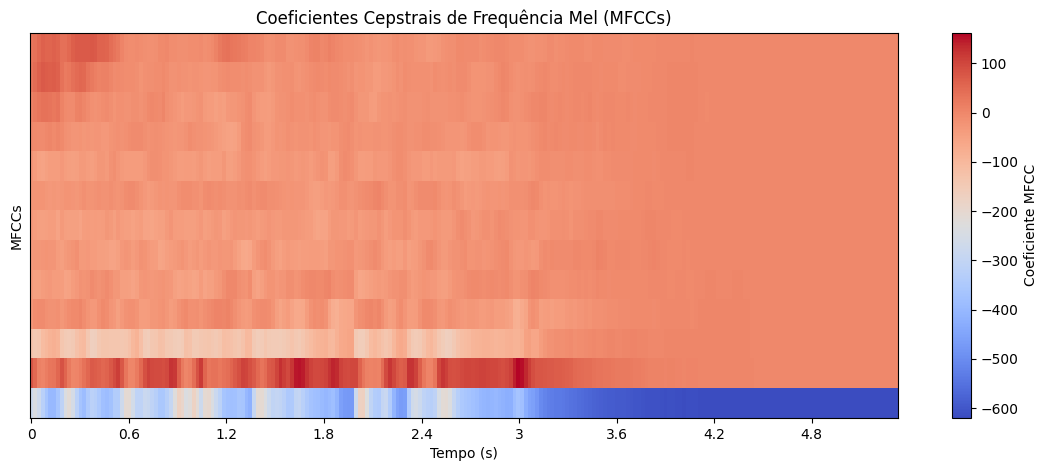

In [ ]:
# Calcula os MFCCs a partir da série temporal do áudio
# n_mfcc: o número de coeficientes a serem retornados
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plota os MFCCs
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(label='Coeficiente MFCC')
plt.title('Coeficientes Cepstrais de Frequência Mel (MFCCs)')
plt.xlabel('Tempo (s)')
plt.ylabel('MFCCs')
plt.show()

O gráfico resultante mostra como os valores de cada um dos 13 coeficientes MFCC variam ao longo do tempo. Esta representação compacta é extremamente útil para que modelos de IA possam "entender" o conteúdo fonético da fala.



## Passo 7: Extraindo o Contraste Espectral

Outra característica interessante é o Contraste Espectral.


Conceito-chave: O Contraste Espectral mede a diferença de amplitude entre os picos (partes mais altas) e os vales (partes mais baixas) do espectro de frequência. Ele ajuda a capturar a "nitidez" do som e pode ser útil para discriminar entre diferentes texturas sonoras ou instrumentos.

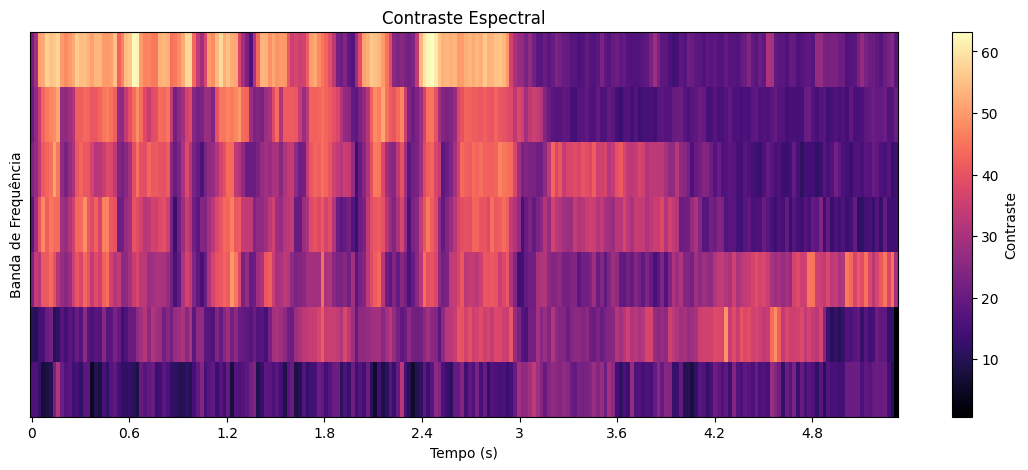

In [ ]:
# Calcula o contraste espectral
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Plota o contraste espectral
plt.figure(figsize=(14, 5))
librosa.display.specshow(contrast, sr=sr, x_axis='time')
plt.colorbar(label='Contraste')
plt.title('Contraste Espectral')
plt.xlabel('Tempo (s)')
plt.ylabel('Banda de Frequência')
plt.show()

Nesta visualização, as cores mais claras indicam um maior contraste entre picos e vales dentro de cada banda de frequência ao longo do tempo.



## Passo 8: Estimando o Pitch (Frequência Fundamental - F0)

O pitch é a nossa percepção de quão "agudo" ou "grave" um som é. Em sons periódicos, como notas musicais ou vogais, o pitch está fortemente associado à frequência fundamental (F0), que é a menor e geralmente mais intensa frequência no espectro harmônico do som.

O librosa possui algoritmos para estimar o F0 ao longo do tempo. Vamos calcular o F0 e plotá-lo sobre o espectrograma para ver como a melodia do trompete se comporta.

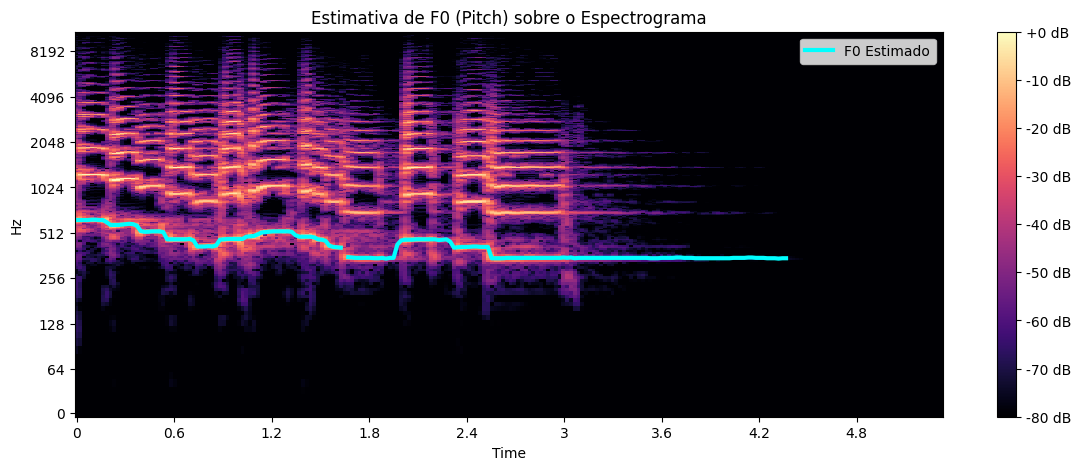

In [ ]:
# Estima a frequência fundamental (F0) usando o algoritmo pYIN
# f0: array com os valores de F0 em Hz
# voiced_flag: array booleano indicando se o frame contém som "vozeado"
# voiced_probs: probabilidade de o frame ser "vozeado"
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Obtém os tempos correspondentes a cada valor de F0
times = librosa.times_like(f0)

# Plota o F0 sobre o espectrograma para visualização
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(14, 5))
img = librosa.display.specshow(S_db, ax=ax, sr=sr, x_axis='time', y_axis='log')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='F0 Estimado', color='cyan', linewidth=3)
ax.legend(loc='upper right')
plt.title('Estimativa de F0 (Pitch) sobre o Espectrograma')
plt.show()

Neste último gráfico, a linha ciano representa a frequência fundamental (a melodia principal) do trompete ao longo do tempo. Podemos ver como ela se alinha perfeitamente com a linha de energia mais baixa e mais forte no espectrograma, demonstrando a precisão da extração.

Este conjunto de características — MFCCs, contraste espectral e pitch — fornece informações ricas e detalhadas sobre o áudio, que são essenciais para treinar os sofisticados modelos de IA generativa que exploraremos nas próximas unidades.

## Passo 9: Extraindo Características Harmônicas (Tonnetz)

O Tonnetz, ou "rede de tons", é uma representação conceitual que mapeia relações harmônicas musicais. Em librosa, podemos extrair características que projetam o conteúdo harmônico do nosso áudio nesse espaço, o que é particularmente útil para tarefas de análise musical que envolvem a compreensão de progressões de acordes e relações tonais.


Para calcular o Tonnetz, primeiro precisamos de uma representação de pitch class, como o croma.



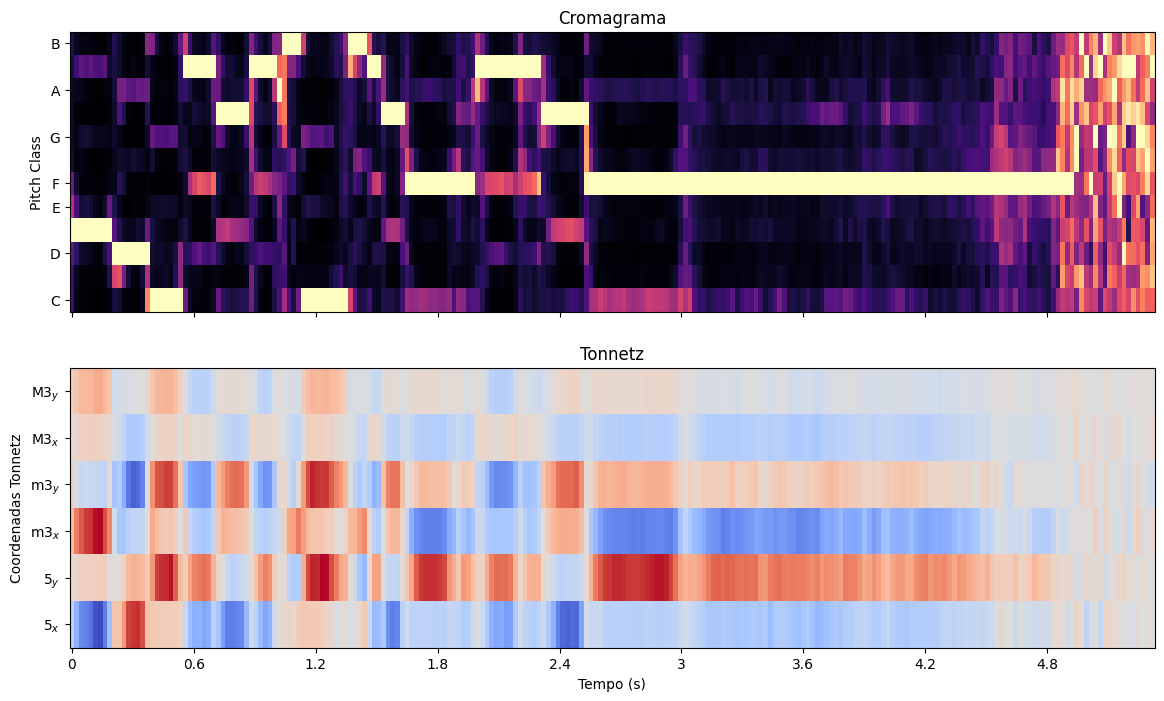

In [ ]:
# Primeiro, vamos calcular as características de croma
# O croma projeta todo o espectro em 12 "bins" que representam as 12 notas da escala cromática.
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# Agora, calculamos as características do Tonnetz a partir do croma
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
# Alternativamente, poderíamos passar o croma já calculado: librosa.feature.tonnetz(chroma=chroma, sr=sr)


# Vamos visualizar ambas as características
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(14, 8))

# Plota o cromagrama
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Pitch Class', title='Cromagrama')
ax[0].label_outer()

# Plota o Tonnetz
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Coordenadas Tonnetz', xlabel='Tempo (s)', title='Tonnetz')

plt.show()

No gráfico superior (Cromagrama), vemos a energia de cada uma das 12 notas musicais (Dó, Dó#, Ré, etc.) ao longo do tempo. No gráfico inferior (Tonnetz), vemos a projeção dessas harmonias em um espaço de 6 dimensões que captura as relações de quintas e terças, fornecendo uma visão geométrica da harmonia.



## Passo 10: Detecção de Eventos (Onsets)

Outra análise fundamental é a detecção de eventos, que foca em identificar momentos significativos no tempo. O tipo de evento mais comum a ser detectado são os onsets, que marcam o início de um som ou de uma nota musical.

Vamos detectar os onsets no nosso áudio de trompete e visualizá-los sobre a forma de onda para ver onde cada nota começa.

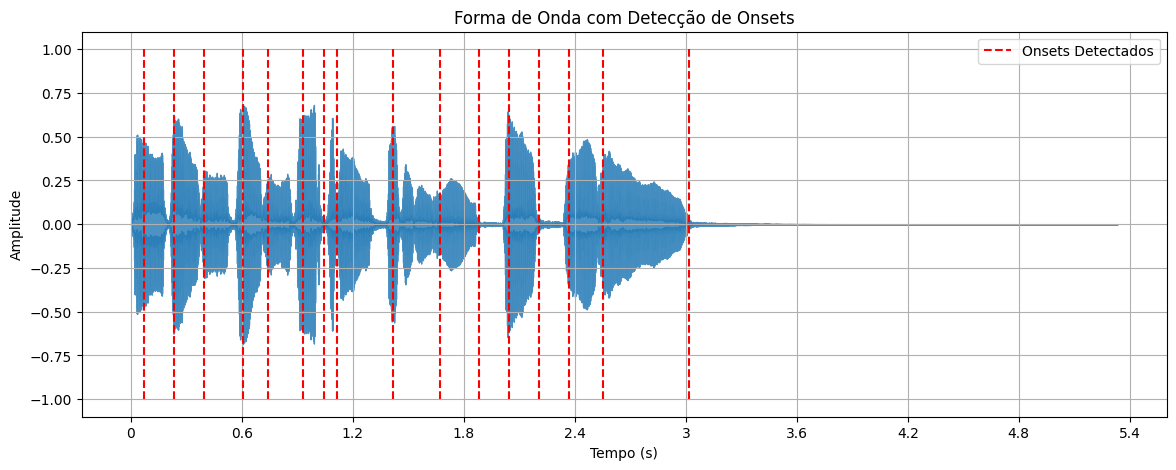

Número de onsets detectados: 16


In [ ]:
# Detecta os onsets no sinal de áudio
# A função retorna os índices dos frames onde os onsets ocorrem
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

# Converte os frames dos onsets para segundos
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Plota a forma de onda e marca os onsets detectados com linhas verticais
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets Detectados')
plt.title('Forma de Onda com Detecção de Onsets')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

print(f"Número de onsets detectados: {len(onset_times)}")

As linhas vermelhas pontilhadas marcam o início de cada nota tocada pelo trompete. A detecção de onsets é um passo fundamental para tarefas como transcrição automática de música, análise de ritmo e segmentação de áudio.



## Exercício Prático: Análise Comparativa de Sinais de Áudio
### Objetivo:

Aplicar as técnicas de extração de características e visualização aprendidas no tutorial para analisar e comparar dois tipos de áudio distintos: fala e música. O objetivo é observar como as diferentes representações (forma de onda, espectrograma, F0, etc.) revelam as assinaturas únicas de cada tipo de som, conectando a teoria com a prática.

### Contexto:

Na Unidade I, vimos que diferentes sons possuem estruturas e características distintas. A fala humana é caracterizada por formantes e uma prosódia variável, enquanto a música instrumental geralmente possui uma estrutura harmônica e rítmica mais definida. Este exercício visa solidificar essa compreensão ao visualizar e comparar essas diferenças.

### Materiais Necessários:

Um ambiente Python com as bibliotecas librosa e matplotlib instaladas (pode ser o mesmo Google Colab do tutorial).

Dois arquivos de áudio curtos (10-20 segundos) e distintos:

Áudio 1: Uma gravação de fala limpa (um trecho de podcast, um audiolivro, ou uma gravação da sua própria voz).

Áudio 2: Uma gravação de música instrumental (uma peça de piano, violão, ou o áudio de trompete usado no tutorial).

### Passo a Passo:

#### 1. Carregamento dos Áudios

Nesta etapa, você irá carregar os dois áudios que serão analisados. Você deve enviar arquivos existentes.

Execute o código abaixo. Ele solicitará que você envie o arquivo de fala primeiro e, em seguida, o arquivo de música.

Carregue seus dois arquivos de áudio usando librosa.load(), armazenando as séries temporais e as taxas de amostragem em variáveis separadas.



In [ ]:
from google.colab import files
import librosa

# Dicionário para armazenar os caminhos dos arquivos
filenames = {}

# Enviar o arquivo de FALA
print("--- Envio do Áudio de FALA ---")
uploaded_fala = files.upload()
fala_filename = next(iter(uploaded_fala))
filenames['fala'] = fala_filename
print(f"Arquivo '{fala_filename}' carregado como áudio de fala.\n")

# Enviar o arquivo de MÚSICA
print("--- Envio do Áudio de MÚSICA ---")
uploaded_musica = files.upload()
musica_filename = next(iter(uploaded_musica))
filenames['musica'] = musica_filename
print(f"Arquivo '{musica_filename}' carregado como áudio de música.\n")

# Carregar os áudios com librosa
y_fala, sr_fala = librosa.load(filenames['fala'])
y_musica, sr_musica = librosa.load(filenames['musica'])

print("Áudios prontos para análise!")

--- Envio do Áudio de FALA ---


KeyboardInterrupt: 

#### 2. Análise e Visualização Comparativa

Aplique as seguintes análises que você aprendeu no tutorial para ambos os áudios e plote os resultados lado a lado ou um após o outro para facilitar a comparação:

- Forma de Onda: Use librosa.display.waveshow().

- Espectrograma: Calcule com librosa.stft() e visualize com librosa.display.specshow().

- Estimativa de F0 (Pitch): Calcule o F0 com librosa.pyin() e sobreponha a linha do pitch no gráfico do espectrograma.

- Detecção de Onsets: Use librosa.onset.onset_detect() e visualize os onsets como linhas verticais sobre a forma de onda.

#### 3. Análise e Perguntas para Reflexão

Após gerar os gráficos para ambos os áudios, responda às seguintes perguntas com base em suas observações:

- Forma de Onda: Compare as formas de onda da fala e da música. Qual delas apresenta trechos de silêncio mais definidos? Qual parece ter uma dinâmica (variações de amplitude/volume) mais consistente?

- Espectrograma: Observe a distribuição de energia (cores mais claras) nos espectrogramas. O áudio de música instrumental mostra estruturas harmônicas claras (linhas horizontais bem definidas)? Como essa estrutura se diferencia da visualização do espectrograma da fala?

- Estimativa de F0 (Pitch): Compare as linhas de F0 (pitch) nos dois gráficos. Na fala, a curva de pitch é mais errática ou suave? Na música, a curva segue uma melodia mais estruturada? O que essa linha representa em cada um dos contextos?

- Detecção de Onsets: Em qual dos áudios a detecção de onsets (início das notas ou palavras) pareceu mais regular e rítmica? Por que você acha que isso acontece?

#### Desafio Extra (Opcional):

Calcule os MFCCs e o Contraste Espectral para ambos os áudios. Embora a interpretação visual direta seja mais complexa, você consegue notar alguma diferença sistemática nos padrões entre a fala e a música?

# Conclusão Final do Tutorial
Ao longo deste tutorial completo, partimos de um arquivo de áudio bruto e o transformamos em um rico conjunto de representações e características:

- Representações Fundamentais: Visualizamos a forma de onda, o espectrograma e o espectrograma Mel, que formam a base para a maioria das análises de áudio.

- Características de Timbre e Conteúdo: Extraímos MFCCs e Contraste Espectral, que descrevem a textura e o conteúdo fonético do som.

- Características Melódicas e Harmônicas: Estimamos o pitch (F0) para seguir a melodia e calculamos o Tonnetz para entender a harmonia.

- Características Rítmicas: Detectamos os onsets para identificar a estrutura de eventos do áudio.

Este conjunto diversificado de features demonstra como podemos decompor um sinal de áudio complexo em componentes significativos. São essas representações que permitem aos modelos de deep learning analisar, classificar e, como veremos nas próximas unidades, gerar áudio com uma complexidade e realismo cada vez maiores.